In [25]:
import helper
import os
import glob
import cv2
import random
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import numpy as np


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(640, 640, 3)


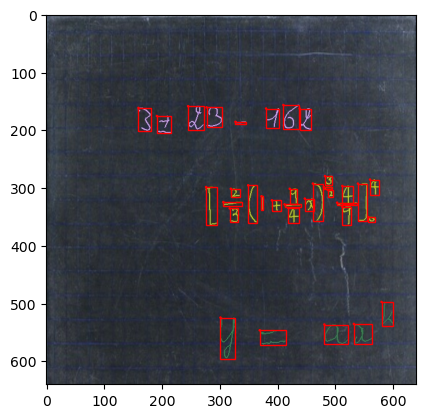

(640, 640, 3)


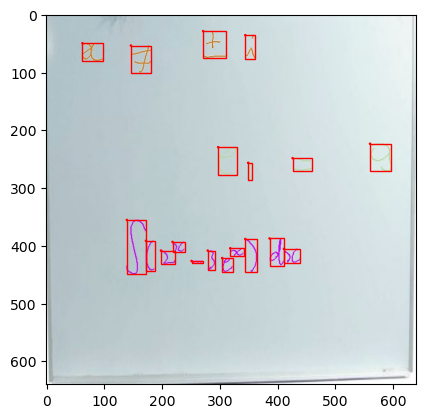

(640, 640, 3)


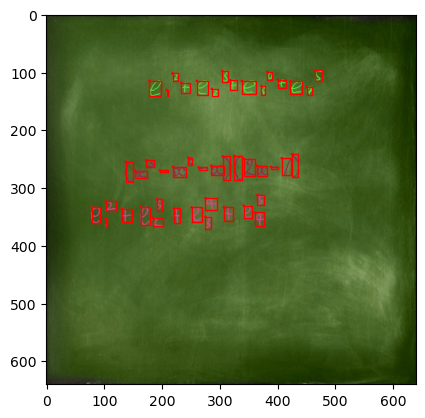

(640, 640, 3)


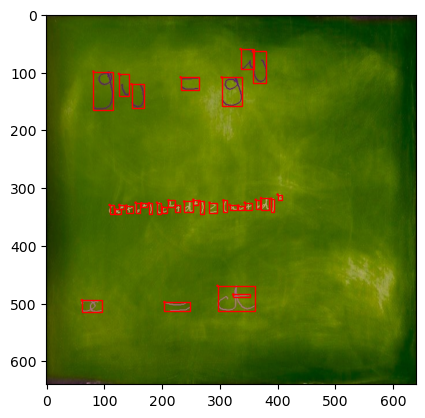

(640, 640, 3)


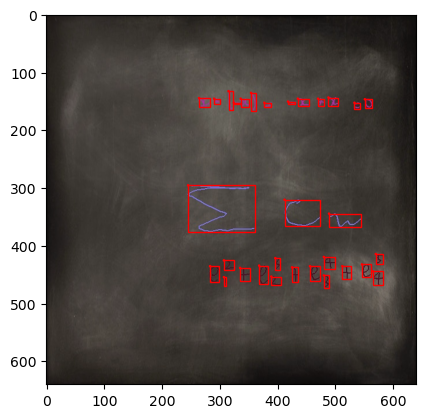

(640, 640, 3)


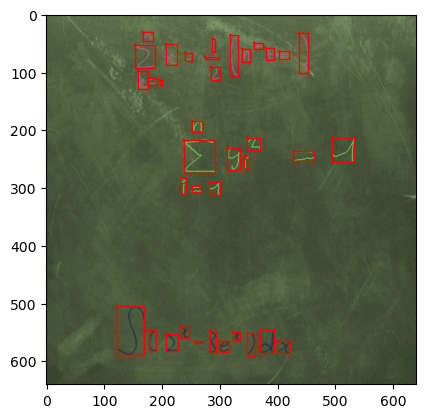

(640, 640, 3)


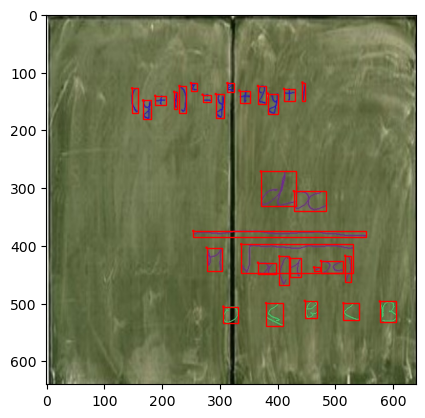

(640, 640, 3)


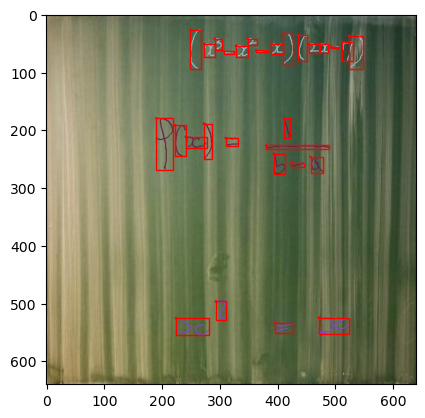

(640, 640, 3)


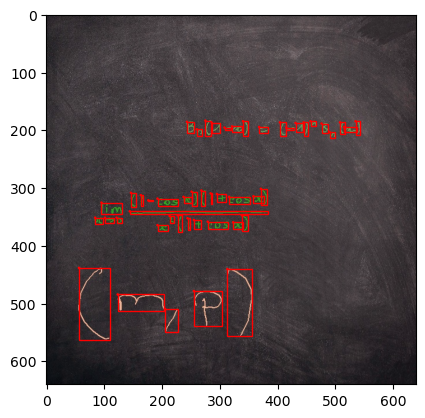

(640, 640, 3)


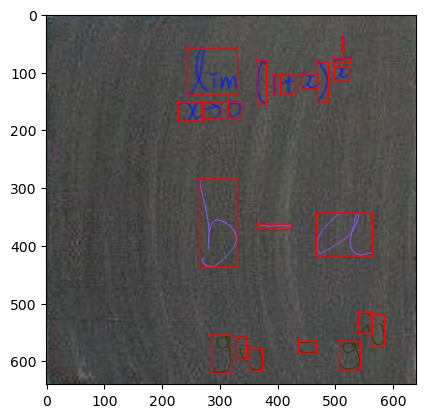

In [49]:
dataset_num = 10
path = 'archive' + os.sep + 'dataset' + str(dataset_num) + os.sep
for i in range(dataset_num):
    image = cv2.imread(path + 'images' + os.sep + str(i) + ".jpg")
    labels = open(path + 'labels' + os.sep + str(i) + ".txt", 'r')
    bboxes = labels.readlines()

    background_height, background_width = image.shape[:2]

    for i, co in enumerate(bboxes):
        co = co.split(' ')[1:]
    
        if '\n' in co:
            continue
        x1 = float(co[0]) * background_width * 2
        y1 = float(co[1]) * background_height * 2
        x2 = float(co[2]) * background_width
        if co[3][-2:-1] == '\n':
            y2 = float(co[3][:-1]) * background_height
        else:
            y2 = float(co[3]) * background_height

        y = [0, 0, 0, 0]
        y[0] = (x1 - x2) / 2  # x center
        y[1] = (y1 - y2) / 2  # y center
        y[2] = x2  # width
        y[3] = y2 # height
        plt.gca().add_patch(Circle((y[0], y[1]), radius=1, color='r')) 
        plt.gca().add_patch(Rectangle((y[0], y[1]), y[2], y[3], linewidth=1, edgecolor='r', facecolor='none')) 

    print(image.shape)
    plt.imshow(image)
    plt.show()
labels.close()


In [ ]:
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("annotations", "images").replace("txt", "png")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)
